In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as ran
sns.set_style('ticks')
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-wuh0cl2a because the default path (/home/ahmed/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
%%time
def random_number(x):
    return ran.randint(70,180)
population_sbp = map(random_number, range(4000000))
population_sbp = list(population_sbp)
population_sbp = np.array(population_sbp)
print(population_sbp.mean())



124.99749575
CPU times: user 4.71 s, sys: 15.8 ms, total: 4.73 s
Wall time: 4.74 s


125.6


<AxesSubplot:ylabel='Count'>

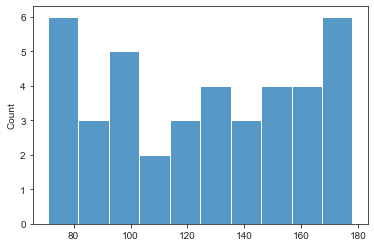

In [17]:
population_of_interest_sbp = np.empty(40)
for i in range(40):
    population_of_interest_sbp[i] = ran.randint(70,180)
print(population_of_interest_sbp.mean())
sns.histplot(population_of_interest_sbp, kde=False, bins=10)

124.95849999999999


<AxesSubplot:ylabel='Count'>

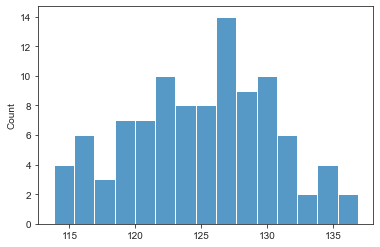

In [19]:
# Lets repeat our experiment 100 times with the same population of 40 patients:
population_of_interest_sbp_mean = np.empty(100)
for i in range(100):    
    bp = np.empty(40)
    for j in range(40):
        bp[j] = ran.randint(70,180)
    population_of_interest_sbp_mean[i] = bp.mean()
# Printing out means of all the experiments
print(population_of_interest_sbp_mean.mean())
sns.histplot(population_of_interest_sbp_mean, bins=15)

124.91460000000001


<AxesSubplot:ylabel='Count'>

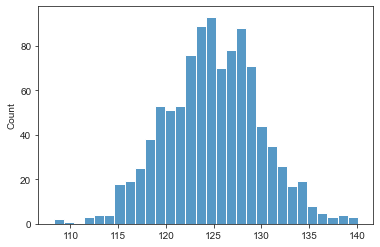

In [20]:
population_of_interest_sbp_mean = np.empty(1000)
for i in range(1000):    
    bp = np.empty(40)
    for j in range(40):
        bp[j] = ran.randint(70,180)
    population_of_interest_sbp_mean[i] = bp.mean()
# Printing out means of all the experiments
print(population_of_interest_sbp_mean.mean())
sns.histplot(population_of_interest_sbp_mean, bins=30)


/home/ahmed/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

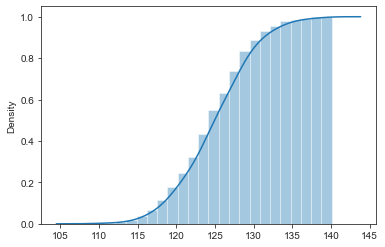

In [31]:
sns.distplot(population_of_interest_sbp_mean, 
             hist_kws = dict(cumulative = True), 
             kde_kws = dict(cumulative=True))

In [33]:
print(ttest_1samp(population_of_interest_sbp_mean, population_sbp.mean()))
(statistic=0.9493915802673526, pvalue=0.3426511014153494)

NameError: name 'ttest_1samp' is not defined

In [35]:
# Lets get the confidence interval for our sub-population mean:
print(np.percentile(population_of_interest_sbp_mean,[2.5, 97.5]))


[115.249375 134.454375]


In [37]:

## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))


t = 3.767194155163821
p = 0.0014108458588313333
t = 3.767194155163821
p = 0.0014108458588314651
